# Milena iddeċidiet li trid il provi
Hawn huma il provi. 😊

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

In [3]:
def load_json(filename):
    with open(filename, "r", encoding="utf-8") as file:
        return json.load(file)

In [4]:
def timestamp_to_datetime(timestamp_ms):
    return datetime.fromtimestamp(timestamp_ms / 1000)

In [5]:
def get_response_times(messages, user_name, friend_name):
    response_times = []
    last_user_message_time = None

    messages.sort(key=lambda x: x["timestamp_ms"])

    for msg in messages:
        sender = msg.get("sender_name")
        timestamp = msg.get("timestamp_ms")

        if not sender or not timestamp:
            continue 

        msg_time = timestamp_to_datetime(timestamp)

        if sender == user_name:
            last_user_message_time = msg_time

        elif sender == friend_name and last_user_message_time:
            response_time = (msg_time - last_user_message_time).total_seconds()
            if response_time > 0:
                response_times.append((response_time, msg_time))

    return response_times

In [6]:

def plot_response_times(response_times):
    if not response_times:
        print("No response times found.")
        return

    times, dates = zip(*response_times)

    if isinstance(dates[0], datetime):
        pass
    else:
        dates = [datetime.fromtimestamp(date / 1000) for date in dates]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, times, linestyle="-", color="#eb63b0", label="Response Time (seconds)")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Add lines for fastest, slowest, and average response times
    # plt.axhline(y=np.min(times), color="green", linestyle="--", label="Fastest Response")
    # plt.axhline(y=np.max(times), color="red", linestyle="--", label="Slowest Response")
    plt.axhline(y=np.mean(times), color="#52c0f2", linestyle="--", label="Average Response")

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gcf().autofmt_xdate()  # Rotate the date labels for better readability

    plt.xlabel("Date (Month-Year)", fontweight="bold")
    plt.ylabel("Response Time (seconds)", fontweight="bold")
    plt.title("Messenger Response Times", fontweight="bold")

    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Fastest response: 10.0 seconds on 2024-02-27 17:40:40
Slowest response: 40.0 seconds on 2024-02-27 17:43:00
Average response time: 19.05 seconds


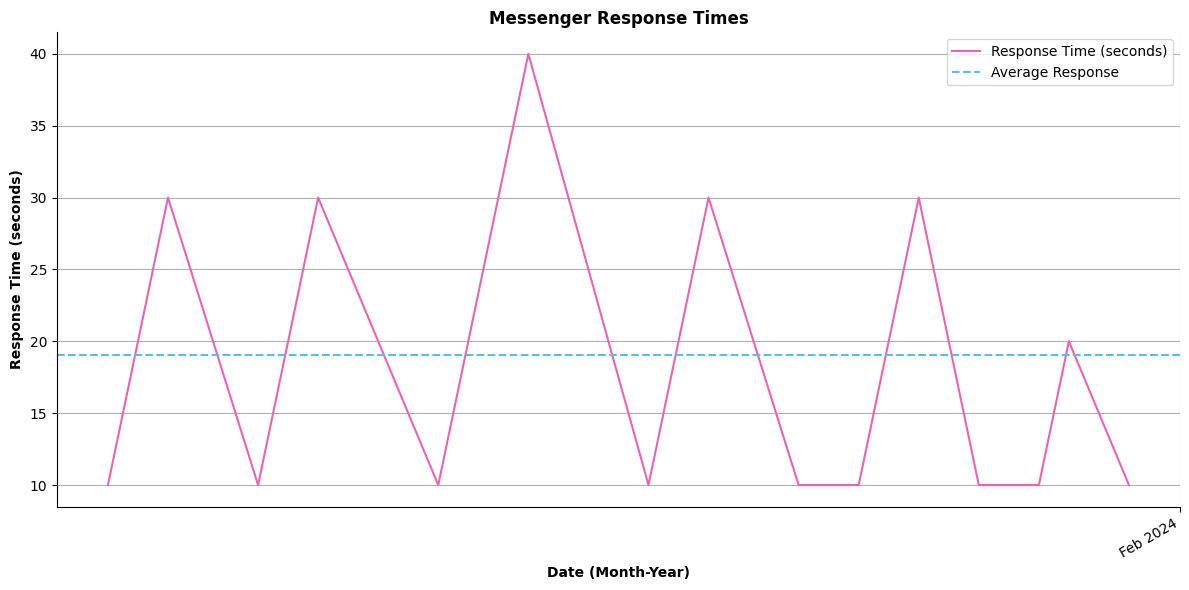

In [7]:

json_file = "messengerConvo.json"
user_name = "Mattea"
friend_name = "Milena"

data = load_json(json_file)
messages = data.get("messages", [])
response_times = get_response_times(messages, user_name, friend_name)

if response_times:
    fastest = min(response_times, key=lambda x: x[0])
    slowest = max(response_times, key=lambda x: x[0])
    avg_time = np.mean([rt[0] for rt in response_times])

    print(f"Fastest response: {fastest[0]} seconds on {fastest[1]}")
    print(f"Slowest response: {slowest[0]} seconds on {slowest[1]}")
    print(f"Average response time: {avg_time:.2f} seconds")

    plot_response_times(response_times)
else:
    print("No valid response times found.")